In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = load_boston()

In [3]:
X = df.data
X.shape

(506, 13)

In [4]:
y = df.target
y.shape

(506,)

In [5]:
df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4, test_size=.2)

In [7]:
NLR = MLPRegressor(activation='tanh', learning_rate='constant', solver='sgd',
                   alpha=.3,hidden_layer_sizes=(100,3), random_state=4, max_iter=1000)

In [8]:
NLR.fit(X_train, y_train)

MLPRegressor(activation='tanh', alpha=0.3, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 3), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=4, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
NLR.n_iter_

50

In [10]:
pred = NLR.predict(X_test)

In [11]:
print("first 5 predictive values are ", pred[:5])

first 5 predictive values are  [21.99295864 21.99296137 21.99296137 21.99295667 21.99295668]


In [12]:
print("first 5 actuall values are ", y_test[:5])

first 5 actuall values are  [16.5 24.8 17.4 19.3 37.6]


In [13]:
NLR.score(X_train, y_train)

-0.0011300372637343958

In [14]:
NLR.score(X_test, y_test)

-0.02321889171317859

In [15]:
mean_absolute_error(pred, y_test)

7.004320346236436

In [16]:
mean_squared_error(pred, y_test)

95.04600917799071

In [17]:
median_absolute_error(pred, y_test)

4.999999999860062

In [18]:
NLR2 = MLPRegressor(activation='relu', learning_rate='constant', solver='lbfgs',
                   alpha=.0005,hidden_layer_sizes=(100,7), random_state=4, max_iter=1000)

In [19]:
NLR2.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 7), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=4, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
NLR2.n_iter_

1001

In [21]:
pred = NLR2.predict(X_test)

In [22]:
print("first 5 predictive values are ", pred[:5])

first 5 predictive values are  [17.30702842 23.37889354 18.81090611 16.88114945 42.16981612]


In [23]:
print("first 5 actuall values are ", y_test[:5])

first 5 actuall values are  [16.5 24.8 17.4 19.3 37.6]


In [24]:
mean_absolute_error(pred, y_test)

2.86430266864992

In [25]:
mean_squared_error(pred, y_test)

15.70810011338085

In [26]:
x = np.arange(0.0, 1, 0.001).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

In [27]:
print('x = \n' ,x.shape)
print('y = \n' ,y.shape)

x = 
 (1000, 1)
y = 
 (1000,)


In [28]:
nn = MLPRegressor(
 hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.001, batch_size='auto',
 learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
 random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
 early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [29]:
nn.fit(x,y)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.01, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=0, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
test_x = np.arange(0.0, 1, 0.05).reshape(-1, 1)
test_y = nn.predict(test_x)

In [31]:
test_x.shape

(20, 1)

<Figure size 432x288 with 0 Axes>

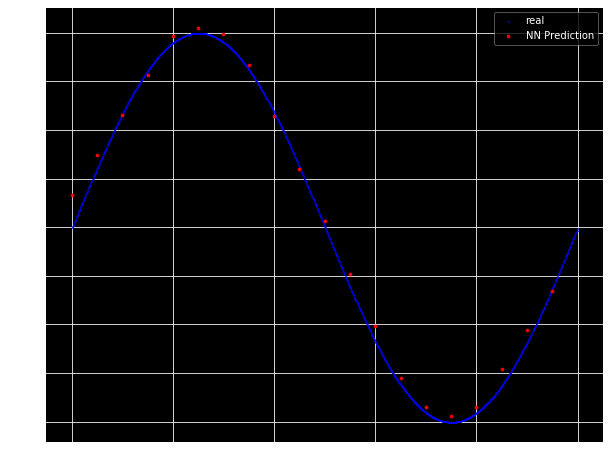

In [32]:
fig = plt.figure()
fig = plt.figure(figsize=(10,8))
plt.style.use(['ggplot', 'dark_background'])

ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=1, c='b', marker="s", label='real')
ax1.scatter(test_x,test_y, s=10, c='r', marker="o", label='NN Prediction')
plt.legend()
plt.show()

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,f1_score,precision_recall_fscore_support,accuracy_score
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

In [34]:
df = load_iris()
X = df.data
y = df.target

In [35]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [38]:
MLPClassifierModel = MLPClassifier(activation='tanh',  solver='lbfgs', 
 learning_rate='constant', 
 early_stopping= False,
 alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)

In [39]:
MLPClassifierModel.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 3), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=33, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [40]:
pred = MLPClassifierModel.predict(X_test)

In [41]:
print("first 5 predictive values are ", pred[:10])

first 5 predictive values are  [2 0 1 1 2 0 2 2 2 1]


In [42]:
print("first 5 actuall values are ", y_test[:10])

first 5 actuall values are  [2 0 1 1 2 0 2 2 2 1]


In [43]:
MLPClassifierModel.score(X_train,y_train)

0.98

In [44]:
MLPClassifierModel.score(X_test,y_test)

0.98

In [45]:
CM = confusion_matrix(pred, y_test)

In [46]:
CM

array([[18,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 17]])

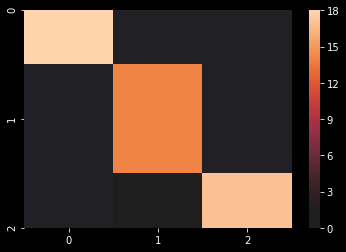

In [47]:
sns.heatmap(CM, center = True)
plt.show()

In [48]:
f1_score(pred, y_test,  average='micro')

0.98

In [49]:
precision_recall_fscore_support(pred, y_test)

(array([1.        , 0.93333333, 1.        ]),
 array([1.        , 1.        , 0.94444444]),
 array([1.        , 0.96551724, 0.97142857]),
 array([18, 14, 18]))

In [50]:
df = pd.read_csv('Dataset_spine.csv')
df = df.drop(['Unnamed: 13'], axis=1)

In [51]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [52]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [53]:
df = df.drop(['Col7','Col8','Col9','Col10','Col11','Col12'], axis=1)
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [54]:
y = df['Class_att']

In [55]:
x = df.drop(['Class_att'], axis=1)

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25,random_state=27)

In [57]:
clf = MLPClassifier(hidden_layer_sizes=(100), max_iter=500, alpha=0.0001,solver='sgd', verbose=10,
random_state=21,tol=0.000000001)

In [58]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 11.64006838
Iteration 2, loss = 13.46662534
Iteration 3, loss = 3.83511946
Iteration 4, loss = 2.84626233
Iteration 5, loss = 1.59617769
Iteration 6, loss = 0.98191110
Iteration 7, loss = 1.01197122
Iteration 8, loss = 1.18898419
Iteration 9, loss = 0.82847246
Iteration 10, loss = 0.81903033
Iteration 11, loss = 0.68004349
Iteration 12, loss = 0.68962666
Iteration 13, loss = 0.70416424
Iteration 14, loss = 0.66151892
Iteration 15, loss = 0.57481294
Iteration 16, loss = 0.58470280
Iteration 17, loss = 0.56371141
Iteration 18, loss = 0.58071918
Iteration 19, loss = 0.52035246
Iteration 20, loss = 0.51704537
Iteration 21, loss = 0.63255104
Iteration 22, loss = 0.53954364
Iteration 23, loss = 0.64119327
Iteration 24, loss = 0.48580134
Iteration 25, loss = 0.46236146
Iteration 26, loss = 0.48585283
Iteration 27, loss = 0.68637440
Iteration 28, loss = 0.46051170
Iteration 29, loss = 0.43663302
Iteration 30, loss = 0.52305096
Iteration 31, loss = 0.42397156
Iteration 32, l

In [59]:
accuracy_score(y_test, y_pred)

0.7564102564102564

In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  4],
       [15, 10]])

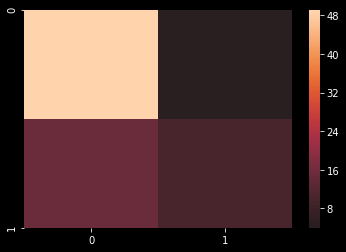

In [61]:
sns.heatmap(cm, center=True)
plt.show()